# Forecasting Stock Perfomance with Prophet

<p><img src="https://picsum.photos/1200/200/?image=357" class="img-fluid" alt="Responsive image" /></p>

In this post we will be using [Prophet](https://facebook.github.io/prophet/) to forecast time series data.
Sections:
* [Imports](#Imports)
* [Data Preparation](#Data-Preparation)
* [Prophet](#Prophet)
* [Simulating Forecasts](#Simulating-Forecasts)
* [Trading Algorithms](#Trading-Algorithms)
* [Summary](#Summary)

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
stock_price =  pd.read_csv(r'C:\Users\abhishek.mishra\Downloads\fb prophet\BALRAMCHIN.NS (1).csv',parse_dates=['Date'])

In [5]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       157 non-null    datetime64[ns]
 1   Open       157 non-null    float64       
 2   High       157 non-null    float64       
 3   Low        157 non-null    float64       
 4   Close      157 non-null    float64       
 5   Adj Close  157 non-null    float64       
 6   Volume     157 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.7 KB


In [6]:
stock_price.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,157,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02
mean,2021-06-30 00:00:00,276.953503,291.266561,263.363376,277.468790,273.863048,1.067946e+07
min,2020-01-01 00:00:00,73.000000,96.000000,68.949997,72.750000,70.725060,1.911641e+06
25%,2020-09-30 00:00:00,160.000000,167.500000,153.500000,159.350006,154.914612,4.946046e+06
50%,2021-06-30 00:00:00,327.299988,340.000000,303.200012,326.950012,322.928680,8.717741e+06
75%,2022-03-30 00:00:00,365.250000,382.750000,350.600006,368.549988,365.348328,1.340760e+07
max,2022-12-28 00:00:00,502.799988,525.900024,489.850006,502.950012,499.597473,5.642260e+07
std,NaN,117.619839,122.514941,112.472720,117.580155,117.723063,8.292588e+06


## Data Preparation

In [7]:
stock_price = stock_price[['Date','Adj Close']]

In [8]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2020-01-01,181.017242
1,2020-01-08,185.100357
2,2020-01-15,178.392426
3,2020-01-22,162.740540
4,2020-01-29,152.775833
5,2020-02-05,154.671585
6,2020-02-12,158.706055
7,2020-02-19,154.914612
8,2020-02-26,138.873886
9,2020-03-04,119.722206


In [9]:
stock_price.tail(10)

,ds,y
147,2022-10-26,328.445953
148,2022-11-02,330.184296
149,2022-11-09,345.233307
150,2022-11-16,356.010986
151,2022-11-23,378.857666
152,2022-11-30,378.311340
153,2022-12-07,366.093323
154,2022-12-14,403.641357
155,2022-12-21,393.757690
156,2022-12-28,394.105347


For prophet to work, we need to change the names of the 'Date' and 'Adj Close' columns to 'ds' and 'y'.  The term 'y' is typically used for the target column (what you are trying to predict) in most machine learning projects.

## Prophet

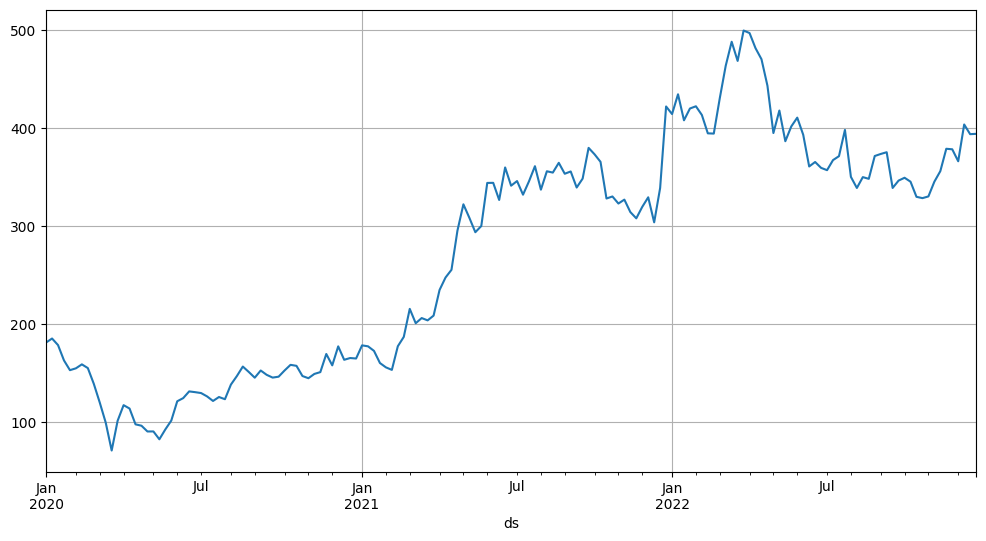

In [10]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [11]:
# Initialize the Model
model=Prophet()

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [15]:
stock_price.columns

Index(['ds', 'y'], dtype='object')

In [17]:
model.fit(stock_price)

17:29:23 - cmdstanpy - INFO - Chain [1] start processing
17:29:25 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [20]:
future_dates.tail()

,ds
517,2023-12-24
518,2023-12-25
519,2023-12-26
520,2023-12-27
521,2023-12-28


In [21]:
prediction=model.predict(future_dates)

In [22]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,84.812167,62.699959,152.722305,84.812167,84.812167,21.925038,21.925038,21.925038,21.925038,21.925038,21.925038,0.0,0.0,0.0,106.737205
1,2020-01-08,86.654759,78.420377,167.074008,86.654759,86.654759,36.657303,36.657303,36.657303,36.657303,36.657303,36.657303,0.0,0.0,0.0,123.312062
2,2020-01-15,88.497351,82.001171,169.309147,88.497351,88.497351,36.292508,36.292508,36.292508,36.292508,36.292508,36.292508,0.0,0.0,0.0,124.789859
3,2020-01-22,90.339944,73.468272,163.095090,90.339944,90.339944,24.686711,24.686711,24.686711,24.686711,24.686711,24.686711,0.0,0.0,0.0,115.026655
4,2020-01-29,92.182536,58.252229,145.570794,92.182536,92.182536,11.519793,11.519793,11.519793,11.519793,11.519793,11.519793,0.0,0.0,0.0,103.702329


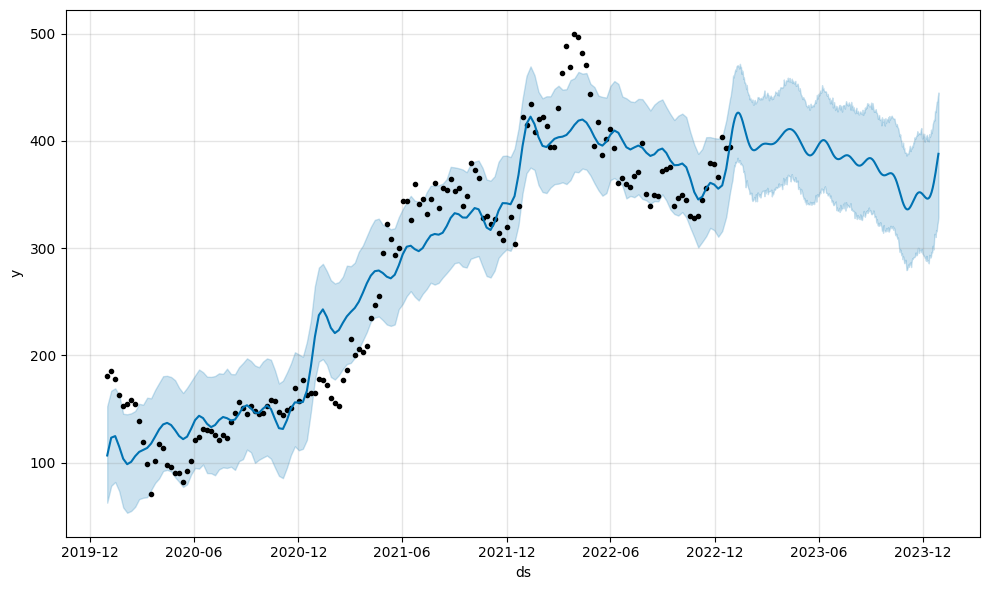

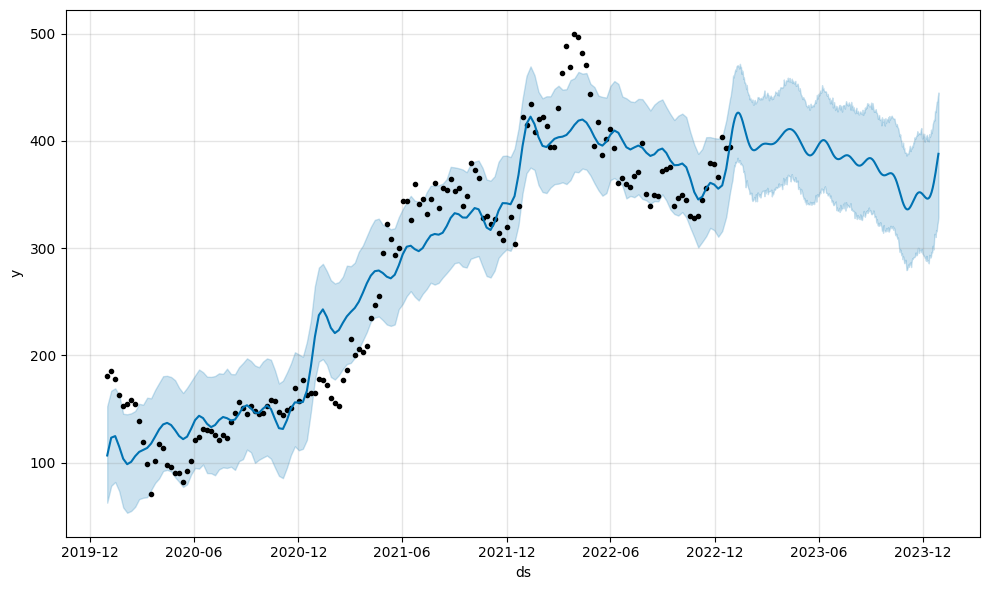

In [23]:
### plot the predicted projection
model.plot(prediction)

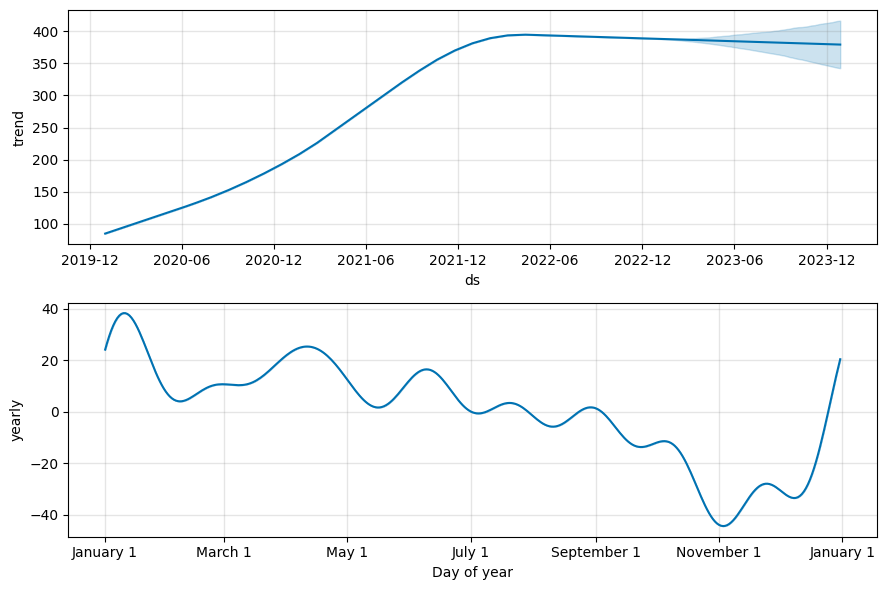

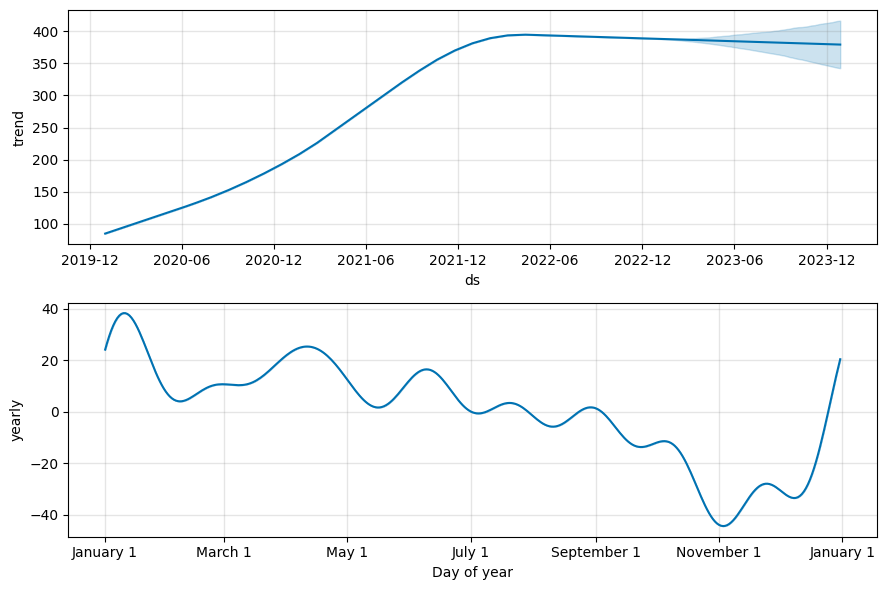

In [24]:
#### Visualize Each Components[Trends,monthly]
model.plot_components(prediction)

In [25]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='700 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

17:39:16 - cmdstanpy - INFO - Chain [1] start processing
17:39:18 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-12-29,334.605075,318.497638,350.584651,422.044434,2021-12-28
1,2022-01-05,341.900659,324.834705,358.610414,414.291016,2021-12-28
2,2022-01-12,345.573324,329.834417,363.261490,434.489441,2021-12-28
3,2022-01-19,340.761407,323.952150,357.374208,407.920349,2021-12-28
4,2022-01-26,331.000012,315.377764,346.618016,419.970276,2021-12-28


In [26]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,6643.622499,81.508420,80.975008,0.192609,0.204645,0.213382,0.0
1,36 days,6960.283268,83.428312,82.700616,0.196676,0.204645,0.218501,0.0
2,43 days,7219.912373,84.970068,84.394754,0.200854,0.204645,0.223576,0.0
3,50 days,6125.231398,78.263858,76.475954,0.184924,0.195622,0.204646,0.0
4,57 days,5560.840047,74.571040,71.262114,0.172835,0.195622,0.190749,0.0


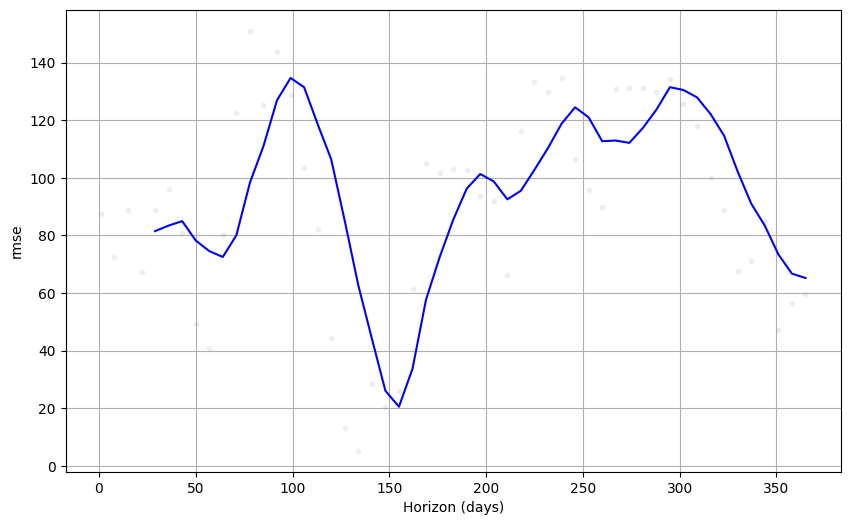

In [27]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

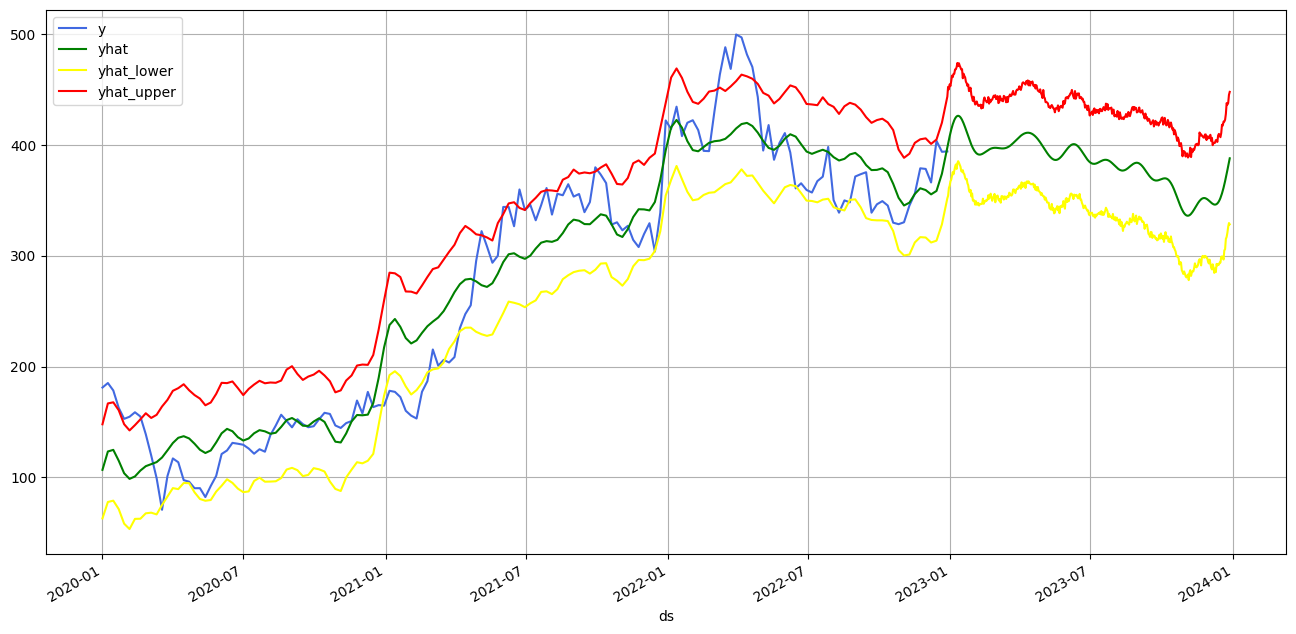

In [35]:
stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "green", "yellow", "red"], grid=True);